## **Notebook EC#03**
## Convolutional classifier for MNIST and CIFAR-10 databases.
**Professor:** Fernando J. Von Zuben <br>
**Aluno(a):**


In [1]:
import tensorflow as tf
import os
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

# Reshape to be [samples][width][height][channels]
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                                 activation='relu',
                                 input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10)
model.summary()

# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test)
print("test loss, test acc:", results)

# Saving the model to disk
model_json = model.to_json()
json_file = open("model_CNN_MNIST.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("model_CNN_MNIST.weights.h5")
print("Model saved to disk")
os.getcwd()

2024-09-11 03:23:30.712374: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-11 03:23:30.721887: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-11 03:23:30.744933: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-11 03:23:30.790073: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-11 03:23:30.803114: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-11 03:23:30.836909: I tensorflow/core/platform/cpu_feature_gu

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 238s 124ms/step - accuracy: 0.8892 - loss: 0.3518
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 247s 132ms/step - accuracy: 0.9762 - loss: 0.0826
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 250s 133ms/step - accuracy: 0.9827 - loss: 0.0584
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 229s 122ms/step - accuracy: 0.9858 - loss: 0.0463
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 228s 121ms/step - accuracy: 0.9878 - loss: 0.0380
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 190s 101ms/step - accuracy: 0.9889 - loss: 0.0356
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 144s 76ms/step - accuracy: 0.9905 - loss: 0.0305
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 99s 53ms/step - accuracy: 0.9918 - loss: 0.0256
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.9918 - loss: 0.0241
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 41ms/step - accuracy: 0.9922 - loss: 0.0241


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,599,648 (13.73 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,399,766 (9.15 MB)

Evaluate on test data
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9905 - loss: 0.0364
test loss, test acc: [0.02811664156615734, 0.9926000237464905]
Model saved to disk


'/home/tulio-queiroz/Documents/repos/repos-unicamp/ea072/inteligencia-artificial'

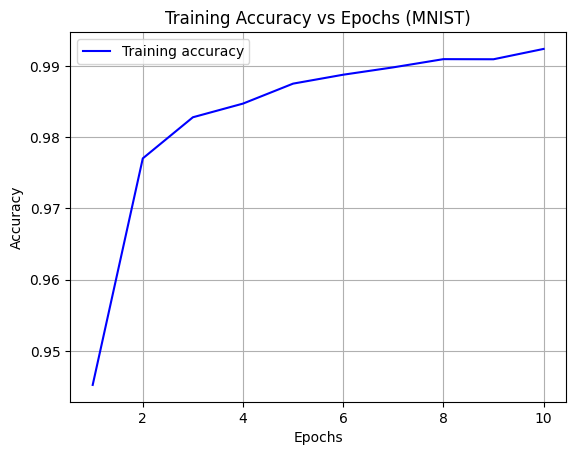

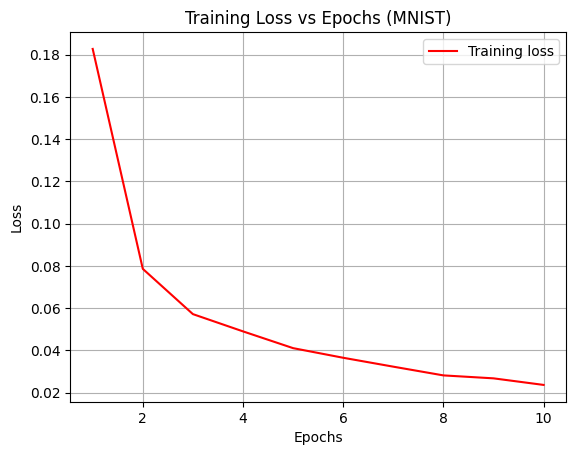

In [2]:
# Behavior along the training process
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training Accuracy vs Epochs (MNIST)')
plt.legend()
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training Loss vs Epochs (MNIST)')
plt.legend()
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [3]:
import tensorflow as tf
import os

cifar10 = tf.keras.datasets.cifar10

(x_train, y_train),(x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                                 activation='relu',
                                 input_shape=(32, 32, 3)))
model1.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model1.add(tf.keras.layers.Dropout(0.25))
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(128, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history1 = model1.fit(x_train, y_train, epochs=10)
model1.summary()

# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model1.evaluate(x_test, y_test)
print("test loss, test acc:", results)

# Saving the model to disk
model_json = model1.to_json()
json_file = open("model_CNN_CIFAR10.json", "w")
json_file.write(model_json)
json_file.close()
model1.save_weights("model_CNN_CIFAR10.weights.h5")
print("Model saved to disk")
os.getcwd()

/home/tulio-queiroz/Documents/repos/repos-unicamp/ea072/inteligencia-artificial/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 50ms/step - accuracy: 0.3424 - loss: 1.7897
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 105s 67ms/step - accuracy: 0.5469 - loss: 1.2678
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 105s 67ms/step - accuracy: 0.6007 - loss: 1.1231
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 56ms/step - accuracy: 0.6372 - loss: 1.0311
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 96s 62ms/step - accuracy: 0.6563 - loss: 0.9771
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 106s 68ms/step - accuracy: 0.6798 - loss: 0.9112
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 52ms/step - accuracy: 0.6909 - loss: 0.8752
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 101s 65ms/step - accuracy: 0.7092 - loss: 0.8135
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 101s 65ms/step - accuracy: 0.7211 - loss: 0.7790
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 106s 68ms/step - accuracy: 0.7314 - loss: 0.7471


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,879,328 (18.61 MB)

 Trainable params: 1,626,442 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,252,886 (12.41 MB)

Evaluate on test data
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.6941 - loss: 0.8775
test loss, test acc: [0.9030779004096985, 0.6895999908447266]
Model saved to disk


'/home/tulio-queiroz/Documents/repos/repos-unicamp/ea072/inteligencia-artificial'

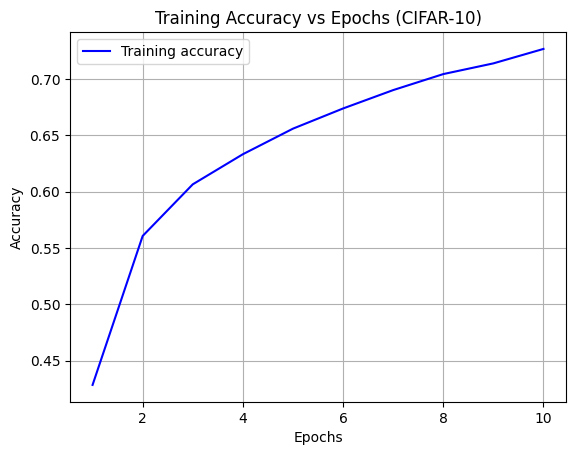

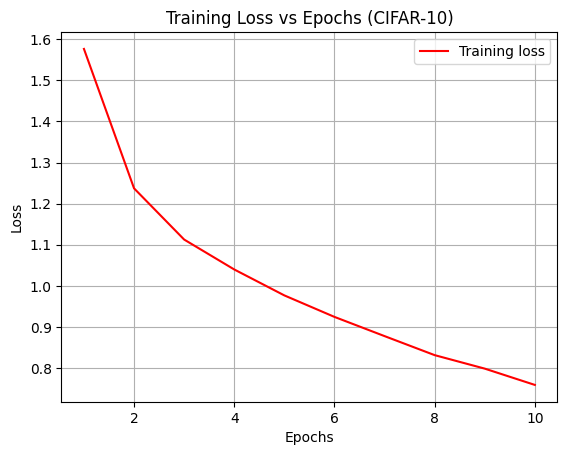

In [4]:
# Behavior along the training process
import matplotlib.pyplot as plt

acc = history1.history['accuracy']
loss = history1.history['loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training Accuracy vs Epochs (CIFAR-10)')
plt.legend()
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training Loss vs Epochs (CIFAR-10)')
plt.legend()
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [5]:
# Summary of the obtained results for the MNIST database
classifier1 = 'Linear           '
classifier2 = 'MLP              '
classifier3 = 'CNN              '
print('--------------------------------------------------')
print('|       Accuracy for the MNIST database          |')
print('--------------------------------------------------')
print('|Classifier type \t Accuracy                |')
print('--------------------------------------------------')
print('| %s: \t\t\t%f |'% (classifier1,0.0000))
print('| %s: \t\t\t%f |'% (classifier2,0.0000))
print('| %s: \t\t\t%f |'% (classifier3,0.0000))
print('--------------------------------------------------')

--------------------------------------------------
|       Accuracy for the MNIST database          |
--------------------------------------------------
|Classifier type 	 Accuracy                |
--------------------------------------------------
| Linear           : 			0.000000 |
| MLP              : 			0.000000 |
| CNN              : 			0.000000 |
--------------------------------------------------


In [6]:
# Summary of the obtained results for the CIFAR10 database
classifier1 = 'Linear           '
classifier2 = 'MLP              '
classifier3 = 'CNN              '
print('--------------------------------------------------')
print('|      Accuracy for the CIFAR10 database         |')
print('--------------------------------------------------')
print('|Classifier type \t Accuracy                |')
print('--------------------------------------------------')
print('| %s: \t\t\t%f |'% (classifier1,0.0000))
print('| %s: \t\t\t%f |'% (classifier2,0.0000))
print('| %s: \t\t\t%f |'% (classifier3,0.0000))
print('--------------------------------------------------')

--------------------------------------------------
|      Accuracy for the CIFAR10 database         |
--------------------------------------------------
|Classifier type 	 Accuracy                |
--------------------------------------------------
| Linear           : 			0.000000 |
| MLP              : 			0.000000 |
| CNN              : 			0.000000 |
--------------------------------------------------
